<a href="https://colab.research.google.com/github/sabrinasaidoune/AI_AND_ML_COURSEWORK/blob/main/2_AI_ASSESSMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import tensorflow as tf

In [2]:
import zipfile

In [3]:
zip_path = "/content/images.zip"
extract_path = "/content/images"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print ("Extraction complete.")
print(os.listdir(extract_path))

Extraction complete.
['ModerateImpairment', 'NoImpairment', 'MildImpairment']


In [4]:
class_names = sorted([d for d in os.listdir(extract_path) if os.path.isdir(os.path.join(extract_path, d))])
print("Classes found:", class_names)

Classes found: ['MildImpairment', 'ModerateImpairment', 'NoImpairment']


In [5]:
# number of images in each class set.
for class_name in class_names:
  class_path = os.path.join(extract_path, class_name)
  print(f"Class: {class_name}, Number of images: {len(os.listdir(class_path))}")

Class: MildImpairment, Number of images: 1792
Class: ModerateImpairment, Number of images: 724
Class: NoImpairment, Number of images: 2560


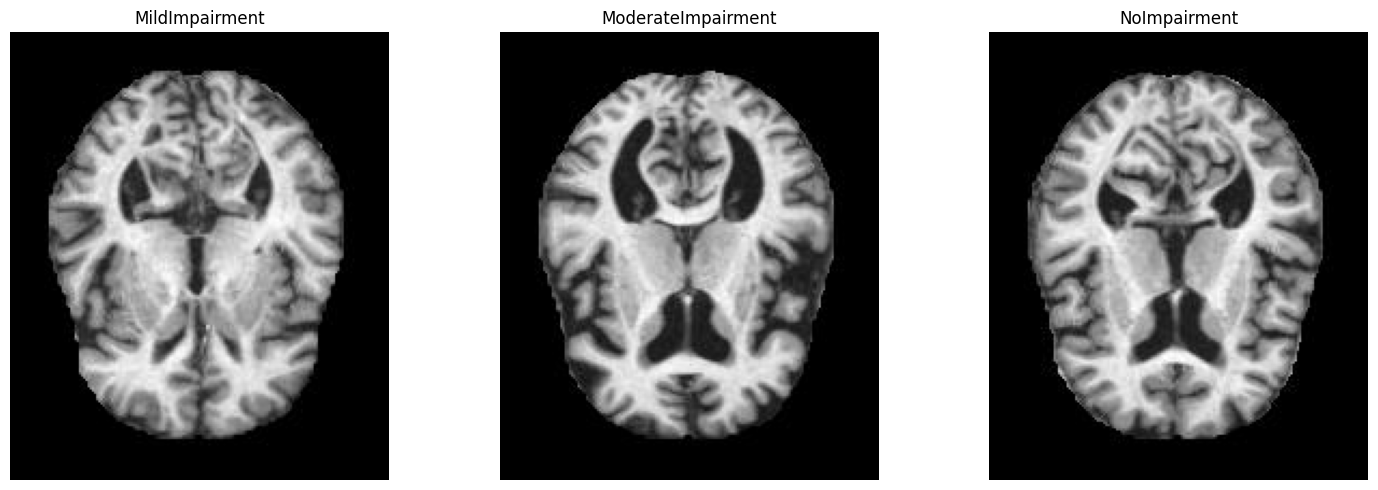

In [7]:
# random visulaisation to ensure quality control.

plt.figure(figsize=(15,5))
for i, class_name in enumerate(class_names):
  class_path = os.path.join(extract_path, class_name)
  img_name = random.choice(os.listdir(class_path))
  img_path = os.path.join(class_path, img_name)

  img = Image.open(img_path).convert("L")
  plt.subplot(1, len(class_names), i+1)
  plt.imshow(img, cmap='gray')
  plt.title(class_name)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
IMG_SIZE = 224
X, y =[], []

class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

for class_name in class_names:
  class_path = os.path.join(extract_path, class_name)
  label = class_to_label[class_name]

for img_name in os.listdir(class_path):
  img_path = os.path.join(class_path, img_name)
  img = Image.open(img_path).convert("L")
  img = img.resize((IMG_SIZE, IMG_SIZE))
  img_array = np.array(img) / 255.0

  X.append(img_array)
  y.append(label)

X = np.array(X)[..., np.newaxis]
y = np.array(y)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2560, 224, 224, 1)
y shape: (2560,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp
)

print("Training:", X_train.shape)
print("Validation:", X_val.shape)
print("Testing:", X_test.shape)


Training: (1792, 224, 224, 1)
Validation: (384, 224, 224, 1)
Testing: (384, 224, 224, 1)


In [10]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(1.0)}


In [11]:
print("All labels:", np.unique(y))
print("Train labels:", np.unique(y_train))
print("Validation labels:", np.unique(y_val))
print("Test labels:", np.unique(y_test))


All labels: [2]
Train labels: [2]
Validation labels: [2]
Test labels: [2]


In [12]:
class_names = sorted(os.listdir(extract_path))
print(class_names)


['MildImpairment', 'ModerateImpairment', 'NoImpairment']


In [13]:
IMG_SIZE = 224
X, y = [], []

class_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}

for class_name in class_names:
    class_path = os.path.join(extract_path, class_name)
    label = class_to_label[class_name]

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        img = Image.open(img_path).convert("L")
        img = img.resize((IMG_SIZE, IMG_SIZE))
        img_array = np.array(img) / 255.0

        X.append(img_array)
        y.append(label)

X = np.array(X)[..., np.newaxis]
y = np.array(y)


In [14]:
from collections import Counter

print("Unique labels:", np.unique(y))
print("Label distribution:", Counter(y))


Unique labels: [0 1 2]
Label distribution: Counter({np.int64(2): 2560, np.int64(0): 1792, np.int64(1): 724})


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


In [16]:
print("Train:", Counter(y_train))
print("Val:", Counter(y_val))
print("Test:", Counter(y_test))


Train: Counter({np.int64(2): 1792, np.int64(0): 1254, np.int64(1): 507})
Val: Counter({np.int64(2): 384, np.int64(0): 269, np.int64(1): 108})
Test: Counter({np.int64(2): 384, np.int64(0): 269, np.int64(1): 109})


In [17]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weights_dict = dict(zip(np.unique(y_train), class_weights))
print("Class weights:", class_weights_dict)


Class weights: {np.int64(0): np.float64(0.9444444444444444), np.int64(1): np.float64(2.335963182117028), np.int64(2): np.float64(0.6609002976190477)}


In [18]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(224, 224, 1)),

    layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,938,243 (49.36 MB)

 Trainable params: 12,938,243 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    class_weight=class_weights_dict,
    callbacks=callbacks
)


Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step - accuracy: 0.3261 - loss: 1.2098 - val_accuracy: 0.1419 - val_loss: 1.1232
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 389s 3s/step - accuracy: 0.3649 - loss: 1.0861 - val_accuracy: 0.5966 - val_loss: 0.9217
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 391s 3s/step - accuracy: 0.5492 - loss: 0.9194 - val_accuracy: 0.6386 - val_loss: 0.7292
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.5941 - loss: 0.7947 - val_accuracy: 0.6689 - val_loss: 0.6693
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - accuracy: 0.6776 - loss: 0.6475 - val_accuracy: 0.5953 - val_loss: 0.7228
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 382s 3s/step - accuracy: 0.7206 - loss: 0.5461 - val_accuracy: 0.7884 - val_loss: 0.4412
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.7845 - loss: 0.4100 - val_accuracy: 0.8331 - val_loss: 0.3792
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.8215 - loss: 0.3538 - val_accu

In [20]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


24/24 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9741 - loss: 0.1001
Test accuracy: 0.9790025949478149


In [21]:
# Evaluate on validation set explicitly
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9817 - loss: 0.0420
Validation Loss: 0.04666127637028694
Validation Accuracy: 0.9842312932014465


24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 902ms/step
                    precision    recall  f1-score   support

    MildImpairment       0.98      0.97      0.98       269
ModerateImpairment       0.99      0.98      0.99       108
      NoImpairment       0.98      0.99      0.99       384

          accuracy                           0.98       761
         macro avg       0.99      0.98      0.98       761
      weighted avg       0.98      0.98      0.98       761



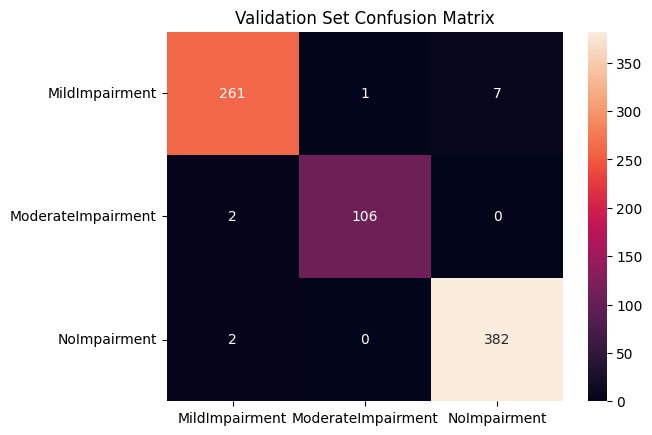

In [22]:
# Get predictions on validation set
y_val_pred_probs = model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred_probs, axis=1)

# Classification report for validation set
print(classification_report(y_val, y_val_pred_classes, target_names=class_names))

# Confusion matrix for validation set
cm_val = confusion_matrix(y_val, y_val_pred_classes)
sns.heatmap(cm_val, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Validation Set Confusion Matrix')
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import json

from sklearn.metrics import classification_report, confusion_matrix

random.seed(42)
np.random.seed(42)

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

print("Class index mapping:")
print(dict(enumerate(class_names)))

print("\nClassification Report:\n")
print(
    classification_report(
        y_test,
        y_pred_classes,
        target_names=class_names,
        digits=4
    )
)

24/24 ━━━━━━━━━━━━━━━━━━━━ 21s 898ms/step
Class index mapping:
{0: 'MildImpairment', 1: 'ModerateImpairment', 2: 'NoImpairment'}

Classification Report:

                    precision    recall  f1-score   support

    MildImpairment     0.9813    0.9740    0.9776       269
ModerateImpairment     0.9815    0.9725    0.9770       109
      NoImpairment     0.9767    0.9844    0.9805       384

          accuracy                         0.9790       762
         macro avg     0.9798    0.9769    0.9784       762
      weighted avg     0.9790    0.9790    0.9790       762



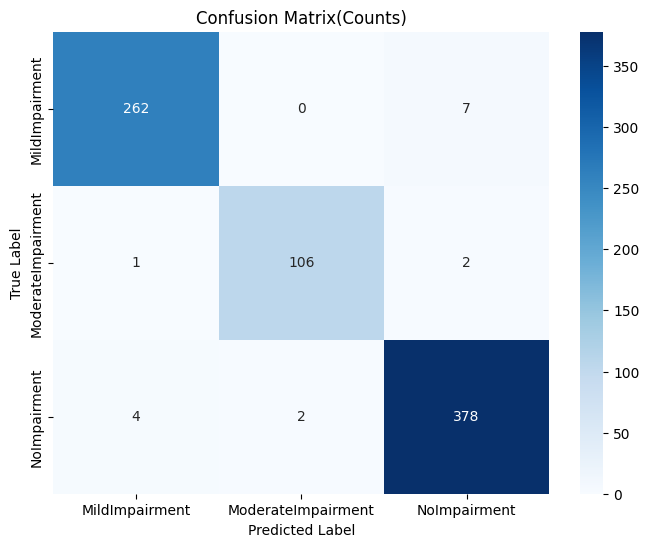

In [25]:
#Confusion Matrix (raw)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix(Counts)')
plt.show()

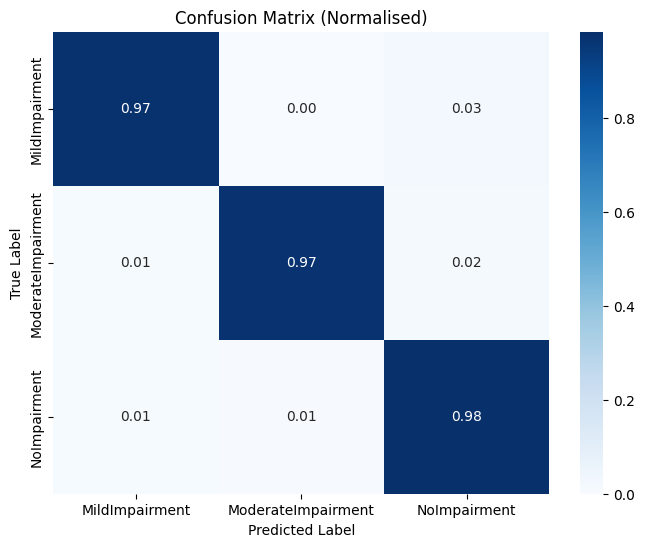

In [26]:
# Confusion Matrix (normalised)

cm_norm = confusion_matrix(
    y_test,
    y_pred_classes,
    normalize='true'
)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix (Normalised)')
plt.show()


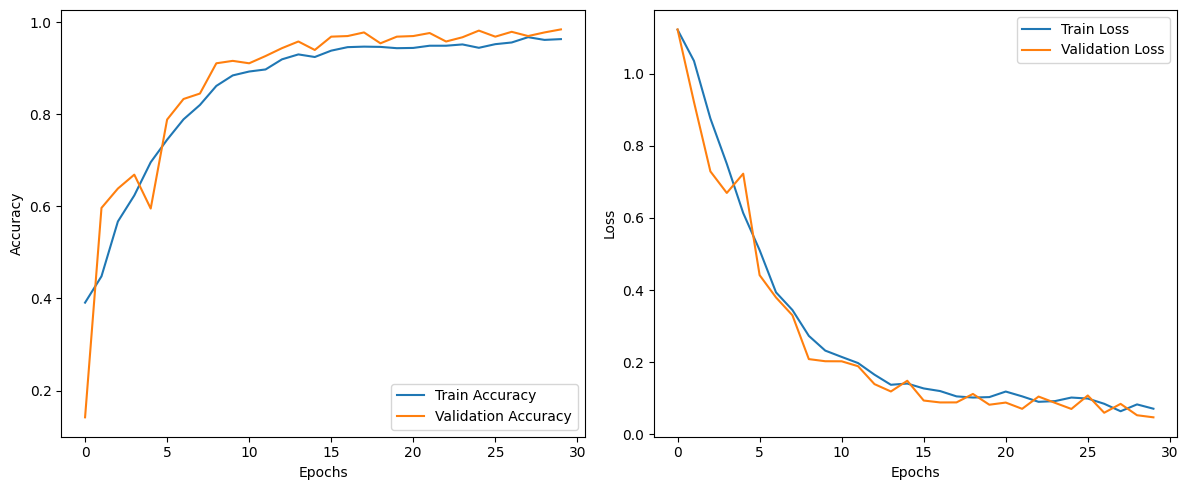

In [27]:
# Plot training histroy

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [28]:
model.save('alzheimers_cnn_model.keras')
print("Model saved as 'alzheimers_snn_model.keras")

with open ('training_history.json', 'w') as f:
  json.dump(history.history, f)

print("Training history saved as 'training_history.json")



Model saved as 'alzheimers_snn_model.keras
Training history saved as 'training_history.json


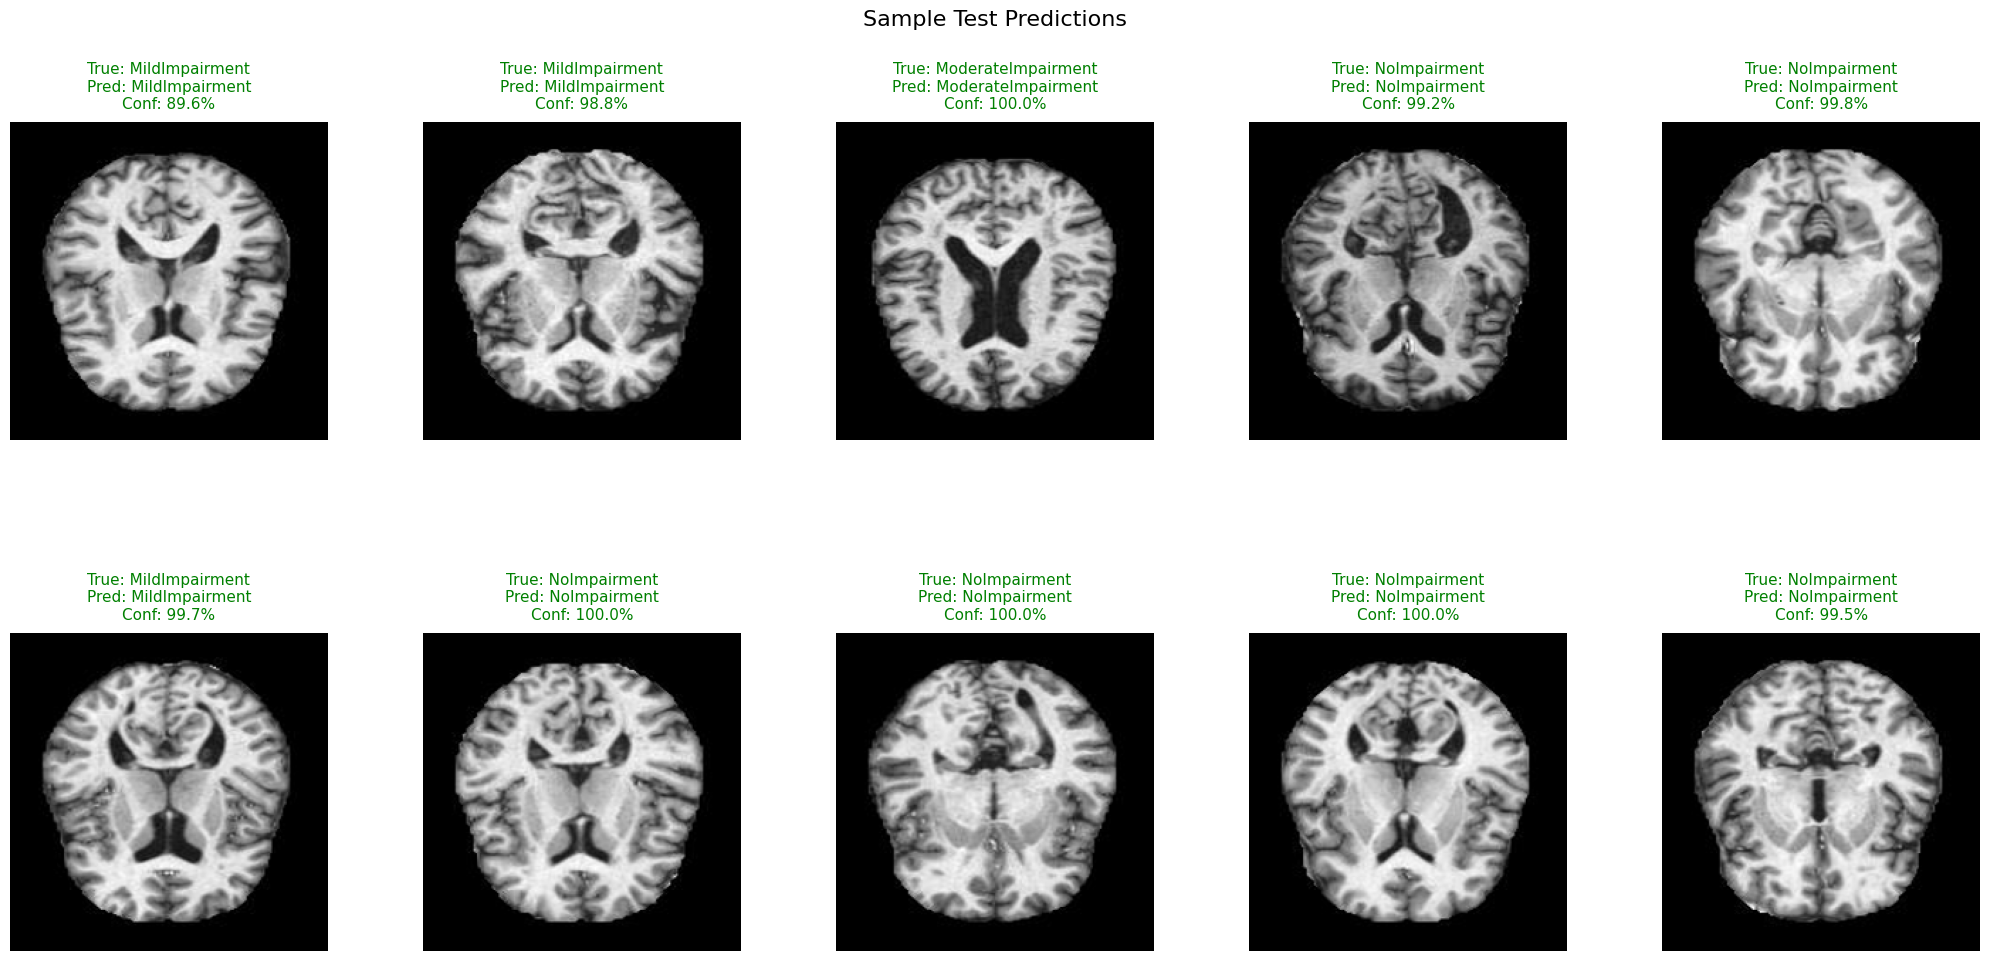

In [29]:
# sample prediction visualisation

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.ravel()

indices = random.sample(range(len(X_test)), 10)

for idx, ax in zip(indices, axes):
    img = X_test[idx].squeeze()
    true_label = class_names[y_test[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    confidence = y_pred_probs[idx][y_pred_classes[idx]] * 100

    ax.imshow(img, cmap='gray')
    ax.axis('off')

    color = 'green' if true_label == pred_label else 'red'
    ax.set_title(
        f"True: {true_label}\n"
        f"Pred: {pred_label}\n"
        f"Conf: {confidence:.1f}%",
        color=color,
        fontsize=11,
        pad=10  # Adds padding between title and image
    )

plt.suptitle('Sample Test Predictions', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leaves space for suptitle
plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Adds vertical and horizontal spacing
plt.show()

In [30]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,814,731 (148.07 MB)

 Trainable params: 12,938,243 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,876,488 (98.71 MB)

In [31]:
print(y_test[:10])
print(y_test.shape)

[0 1 1 0 2 0 2 2 2 1]
(762,)


In [32]:
import numpy as np
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))


{np.int64(0): np.int64(269), np.int64(1): np.int64(109), np.int64(2): np.int64(384)}


In [33]:
class_names = sorted(os.listdir(extract_path))
print(class_names)



['MildImpairment', 'ModerateImpairment', 'NoImpairment']


24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 852ms/step


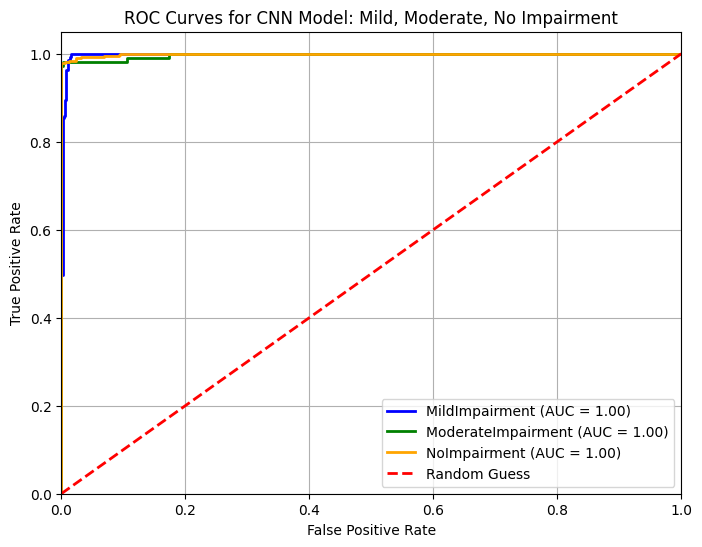

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# --- 1. Predict probabilities on the test set ---
y_pred_probs = model.predict(X_test)  # shape: (762, 3)

# --- 2. One-hot encode integer labels for ROC calculation ---
y_test_onehot = label_binarize(y_test, classes=[0, 1, 2])  # shape: (762, 3)

# --- 3. Compute ROC and AUC for each class ---
fpr = {}
tpr = {}
roc_auc = {}

class_names = ['MildImpairment', 'ModerateImpairment', 'NoImpairment']
colors = ['blue', 'green', 'orange']

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_onehot[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# --- 4. Plot ROC curves ---
plt.figure(figsize=(8,6))

for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{class_names[i]} (AUC = {roc_auc[i]:.2f})')

# Random guessing line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

# Axes, title, legend
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for CNN Model: Mild, Moderate, No Impairment')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
